In [7]:
%matplotlib inline

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


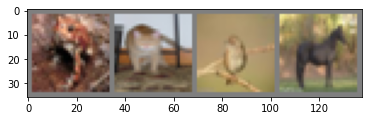

 frog   cat  bird horse


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [21]:
import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
criterion = nn.MultiMarginLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [24]:
epoch_loss = []
for epoch in range(10):  # loop over the dataset multiple times
    loss_list = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        loss_list.append(running_loss)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    epoch_loss.append(np.mean(loss_list))
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3349: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [4].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  return torch._C._nn.multi_margin_loss(input, target, p, margin, weight, reduction_enum)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3349: UserWarning: An output with one or more elements was resized since it had shape [4], which does not match the required output shape [].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resi

[1,  2000] loss: 0.307
[1,  4000] loss: 0.298
[1,  6000] loss: 0.295
[1,  8000] loss: 0.297
[1, 10000] loss: 0.284
[1, 12000] loss: 0.286
[2,  2000] loss: 0.262
[2,  4000] loss: 0.259
[2,  6000] loss: 0.269
[2,  8000] loss: 0.260
[2, 10000] loss: 0.262
[2, 12000] loss: 0.261
[3,  2000] loss: 0.237
[3,  4000] loss: 0.244
[3,  6000] loss: 0.235
[3,  8000] loss: 0.237
[3, 10000] loss: 0.249
[3, 12000] loss: 0.246
[4,  2000] loss: 0.219
[4,  4000] loss: 0.220
[4,  6000] loss: 0.224
[4,  8000] loss: 0.227
[4, 10000] loss: 0.225
[4, 12000] loss: 0.225
[5,  2000] loss: 0.200
[5,  4000] loss: 0.215
[5,  6000] loss: 0.211
[5,  8000] loss: 0.222
[5, 10000] loss: 0.210
[5, 12000] loss: 0.219
[6,  2000] loss: 0.197
[6,  4000] loss: 0.195
[6,  6000] loss: 0.202
[6,  8000] loss: 0.203
[6, 10000] loss: 0.212
[6, 12000] loss: 0.212
[7,  2000] loss: 0.184
[7,  4000] loss: 0.187
[7,  6000] loss: 0.199
[7,  8000] loss: 0.203
[7, 10000] loss: 0.194
[7, 12000] loss: 0.200
[8,  2000] loss: 0.187
[8,  4000] 

No handles with labels found to put in legend.


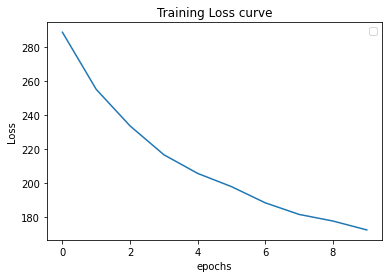

In [25]:
plt.plot(epoch_loss)
plt.title('Training Loss curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [29]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data   
        images, labels = images.to(device), labels.to(device) 
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Accuracy for class plane is: 63.2 %
Accuracy for class car   is: 69.8 %
Accuracy for class bird  is: 42.3 %
Accuracy for class cat   is: 20.7 %
Accuracy for class deer  is: 48.7 %
Accuracy for class dog   is: 66.9 %
Accuracy for class frog  is: 69.2 %
Accuracy for class horse is: 61.6 %
Accuracy for class ship  is: 67.7 %
Accuracy for class truck is: 52.6 %
